# Prediction Module

    The main goal of the prediction module is to use the PropaPhenKG+ and the observations found in the detection module to cluster the observations into similar phenomenon clusters

In [1]:
%load_ext autoreload
%autoreload 2

## Libraries

### Installing

In [2]:
#!pip install pandas
#!pip install tqdm
#!pip install -U scikit-learn
#!pip install matplotlib

### Standard

In [3]:
import pandas as pd
import numpy as np
from functools import partial

### Custom libraries

In [4]:
sys.path.append('../lib/')
from prediction.predictionmodule import PredictionModule,BenchMark
from prediction.embedding.bow import ObservationBoWEmbedding
from prediction.embedding.kgembedding import ObservationHomogeneousEmbedding, ObservationHeterogeneousEmbedding
from prediction.embedding.semantic import ObservationLCEmbedding,ObservationHSEmbedding, ObservationRelTopicEmbedding
from prediction.clustering import KMeansClustering

## Globals

In [5]:
path_to_kb_gazetteer = "../data/detection/gazetteers/kbgazetteer.csv"
path_to_netwoork_gazetteer = "../data/detection/gazetteers/world_gazetteer.csv"
path_to_observationcsv = "../Detection/data/csv/observations_phrase.csv"
path_to_worldkg_nodes = "../Description/data/worldkg_nodes.csv"

In [6]:
path_to_observations = "../data/detection/outputs/observations/"

In [7]:
# Homogeneous embeddings
kb_fastrp_embedding_path="../data/prediction/embeddings/fastrp/umls-fastrp_embedding.csv"
net_fastrp_embedding_path="../data/prediction/embeddings/fastrp/worldkg-fastrp_embedding.csv"
kb_node2vec_embedding_path="../data/prediction/embeddings/node2vec/umls-node2vec.csv"
net_node2vec_embedding_path="../data/prediction/embeddings/node2vec/worldkg-node2vec.csv"

In [8]:
# Heterogeneous embeddings
kb_hashgnn_embedding_path="../data/prediction/embeddings/hashgnn/umls-hashgnn.csv"
net_hashgnn_embedding_path="../data/prediction/embeddings/hashgnn/worldkg-hashgnn.csv"
kb_graphsage_embedding_path="../data/prediction/embeddings/graphsage/umls_graphsage.csv"
net_graphsage_embedding_path="../data/prediction/embeddings/graphsage/worldkg_graphsage.csv"

In [9]:
# Semantic embeddings
kb_concept_path="../data/prediction/embeddings/semantic/semantic_types_export.csv"
net_concept_path="../data/prediction/embeddings/semantic/world_semantic_type.csv"
## Distance
kb_distance_path="../data/prediction/embeddings/semantic/shortestpath.csv"
net_distance_path="../data/prediction/embeddings/semantic/world_shortestdistance.csv"
# Turns
kb_turns_path = "../data/prediction/embeddings/semantic/turns.csv"
net_turns_path = "../data/prediction/embeddings/semantic/world_turns.csv"
# RelTopic
kb_dijkstra_path = "../data/prediction/embeddings/semantic/dijkstra.csv"
net_dijkstra_path = "../data/prediction/embeddings/semantic/world_dijkstra.csv"
kb_neighborhood_path = "../data/prediction/embeddings/semantic/neighborhood.csv"
net_neighborhood_path = "../data/prediction/embeddings/semantic/world_neighborhood.csv"
kb_specialdegree_path = "../data/prediction/embeddings/semantic/specialdegree.csv"
net_specialdegree_path = "../data/prediction/embeddings/semantic/world_special_degree.csv"
# Wang
kb_sa_path = "../data/prediction/embeddings/semantic/umls_sa.csv"
net_sa_path = "../data/prediction/embeddings/semantic/world_sa.csv"
kb_sva_path = "../data/prediction/embeddings/semantic/umls_sva.csv"
net_sva_path = "../data/prediction/embeddings/semantic/world_sva.csv"

## Observation Embedding

    It should get the observations and the PropaPhenKG+ to transform the observations into observation vectors

In [10]:
predictionModule = PredictionModule(path_to_kb_gazetteer,
                path_to_netwoork_gazetteer,
                path_to_observations)

In [16]:
from prediction.utils import obsToList
import os
from tqdm import tqdm

def obs_to_folder(df_obs,folder_name):
    # Populate the observation matrix
    chemin = "../data/prediction/observation_txt/"
    # Check whether the specified path exists or not
    isExist = os.path.exists(chemin+folder_name)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(chemin+folder_name)
    for _, row in tqdm(df_obs.iterrows()):
        system_kb_items = obsToList(row['KB_Components'])
        fichier = ""
        for kb_item in system_kb_items:
            fichier += kb_item + "\n"
        file_name = row['Observation_Name'] + "_"+ str(row['average_date'])
        with open(chemin+folder_name+"/"+file_name+".txt", "w") as text_file:
            text_file.write(fichier)

def obs_concept_to_folder(df_obs,folder_name):
    # Populate the observation matrix
    chemin = "../data/prediction/observation_txt/"
    # Check whether the specified path exists or not
    isExist = os.path.exists(chemin+folder_name)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(chemin+folder_name)
    for _, row in tqdm(df_obs.iterrows()):
        system_kb_items = obsToList(row['KB_Components'])
        fichier = ""
        for kb_item in system_kb_items:
            fichier += kb_item + "\n"
        file_name = row['Observation_Name'] + "_"+ str(row['average_date'])
        with open(chemin+folder_name+"/"+file_name+".txt", "w") as text_file:
            text_file.write(fichier)

In [17]:
predictionModule.re_dict.keys()

dict_keys(['DocumentMatching', 'ParagraphMatching', 'SentenceMatching'])

In [18]:
for key in predictionModule.re_dict.keys():
    obs_to_folder(predictionModule.re_dict[key],key)

339it [00:00, 5379.47it/s]
71it [00:00, 6094.00it/s]
126it [00:00, 5943.41it/s]


In [19]:
predictionModule.re_dict['DocumentMatching']

,Unnamed: 0,System_Name,System_ID,average_date,KB_Components,KB_IDs,intensity,Observation_Name
0,0,"""Australia""",wkg:424315584,19.916667,"['aluminum hexafluorosilicate(2-) (3:2)', 'www...","['A1327850', 'A18580952', 'A34748310', 'A83231...","[62, 64, 68, 68, 76, 80, 80, 80, 80, 84, 86, 8...",Journal_COVID_Australia
1,1,"""Belgium""",wkg:1684793666,19.916667,['https://github.com/geneontology/go-ontology/...,"['A34454909', 'A18580952', 'A34748310', 'C3639...","[124, 128, 136, 152, 160, 160, 160, 160, 168, ...",Journal_COVID_Belgium
2,2,"""Bulgaria""",wkg:424315709,19.916667,"['aluminum hexafluorosilicate(2-) (3:2)', 'www...","['C0608509', 'A18580952', 'A34748310', 'C08707...","[434, 448, 476, 476, 532, 560, 560, 560, 560, ...",Journal_COVID_Bulgaria
3,3,"""Canada""",wkg:424313760,19.916667,"['aluminum hexafluorosilicate(2-) (3:2)', 'IV:...","['C0608509', 'A18580952', 'A34748310', 'A21421...","[62, 68, 68, 76, 76, 80, 80, 80, 80, 84, 86, 8...",Journal_COVID_Canada
4,4,"""China""",wkg:424313582,19.916667,"['researchers', 'caused by', 'said', 'bat', 'R...","['A18668123', 'A18613966', 'A18647070', 'A1862...","[252, 264, 264, 270, 272, 278, 288, 288, 348, ...",Journal_COVID_China
...,...,...,...,...,...,...,...,...
334,33,"""Ukraine""",wkg:1648342273,22.416667,"['Health', 'PODCI Pediatric Parent-Reported Ve...","['A12925389', 'A13987869', 'A18597116', 'A1860...","[5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 8, ...",Journal_Monkeypox_Ukraine
335,34,"""United Arab Emirates""",wkg:424310703,22.416667,"['rash', 'O/E: E.M. micr.: virus', 'cases', 'v...","['A18674382', 'A18587731', 'A18650525', 'A4831...","[5, 6, 6, 6, 10]",Journal_Monkeypox_United Arab Emirates
336,35,"""United Kingdom""",wkg:838090640,22.416667,"['disease', 'cardiac catheterization post-proc...","['A18683747', 'A13987869', 'A18647936', 'A3356...","[100, 102, 102, 109, 114, 122, 122, 122, 127, ...",Journal_Monkeypox_United Kingdom
337,36,"""United States""",wkg:424317935,22.416667,"['hospital', 'contact with', 'fever', 'disease...","['A28753931', 'A12925770', 'A18563007', 'A1868...","[287, 302, 302, 329, 331, 343, 344, 362, 362, ...",Journal_Monkeypox_United States


In [20]:
from prediction.utils import obsToList
import ast
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import classification_report
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import ast
from tqdm import tqdm

In [21]:
def clusterObservations(embedding_df, k=2, random_seed=42, include_spatial=True, include_temporal=True):
    """
    Cluster observations using k-medoids and evaluate the clusters.
    
    :param embedding_matrix: The matrix of embeddings for observations.
    :param df_obs: DataFrame containing observation data.
    :param k: Number of clusters for k-medoids.
    :param random_seed: Random seed for reproducibility.
    :param include_temporal: If True, includes date in the distance calculation.
    :return: Cluster labels, the best type list, and the best F1 score.
    """

    distance_matrix = 1-embedding_df.drop(embedding_df.columns[0],axis=1).to_numpy(dtype=float)
    # Rescale the entire distance matrix to the range [0, 1]
    max_distance = np.max(distance_matrix)
    min_distance = np.min(distance_matrix)
    if max_distance > min_distance:  # Avoid division by zero
        distance_matrix = (distance_matrix - min_distance) / (max_distance - min_distance)
    
    print("Clustering observations with k-medoids...")
    kmedoids = KMedoids(n_clusters=k, metric="precomputed", random_state=random_seed)
    kmedoids_labels = kmedoids.fit_predict(distance_matrix)
    
    print("Evaluating clustering...")
    list_type_0 = []
    list_type_1 = []
    for _, row in embedding_df.iterrows():
        if "COVID" in row["Unnamed: 0"]:
            list_type_1.append(0)
            list_type_0.append(1)
        else:
            list_type_1.append(1)
            list_type_0.append(0)
    
    report_1 = classification_report(list_type_1, kmedoids_labels, output_dict=True)
    score_1 = report_1['weighted avg']['f1-score']
    report_0 = classification_report(list_type_0, kmedoids_labels, output_dict=True)
    score_0 = report_0['weighted avg']['f1-score']
    
    if score_1 >= score_0:
        best_score = score_1
        best_type = list_type_1
    else:
        best_score = score_0
        best_type = list_type_0
    
    print(f"Clustering completed. Best F1 Score: {best_score:.4f}")
    return kmedoids_labels, best_type, best_score

In [22]:
import os

path_to_distance_matrixes = "../data/prediction/AIME/Modeles/"

# List all CSV files in the folder and its subfolders
df_matrix_list = []
for root, dirs, files in os.walk(path_to_distance_matrixes):
    for file in files:
        if file.endswith('.csv'):
            df_matrix_list.append(os.path.join(root, file))

In [23]:
df_matrix_dict = {}
for path in df_matrix_list:
    df_matrix_dict[path.split('/')[-1].replace('.csv',"")] = pd.read_csv(path)

In [24]:
predictionModule.bench.dict_bench={}
for method in df_matrix_dict:
    print("Method: "+ method)
    R = clusterObservations(df_matrix_dict[method])
    predictionModule.bench.dict_bench[method] = R[-1]

Method: PubMedBERT_similarity_matrix-paragraphMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.7652
Method: PubMedBERT_similarity_matrix-sentenceMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.6499
Method: PubMedBERT_similarity_matrix-documentMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.7134
Method: All-mini-lm_similarity_matrix-documentMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.7618
Method: All-mini-lm_similarity_matrix-paragraphMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.7091
Method: All-mini-lm_similarity_matrix-sentenceMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.7931
Metho

/data/dataRapide/gabriel/git/DDPF/Prediction/prvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/dataRapide/gabriel/git/DDPF/Prediction/prvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/dataRapide/gabriel/git/DDPF/Prediction/prvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Clustering completed. Best F1 Score: 0.7931
Method: bioelectra_similarity_matrix-documentMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.8604
Method: bioelectra_similarity_matrix-sentenceMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.8651
Method: bioelectra_similarity_matrix-paragraphMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.6972
Method: similarity_matrix-documentMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.8983
Method: similarity_matrix-sentenceMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.7938
Method: similarity_matrix-paragraphMatching
Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.70

/data/dataRapide/gabriel/git/DDPF/Prediction/prvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/dataRapide/gabriel/git/DDPF/Prediction/prvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/dataRapide/gabriel/git/DDPF/Prediction/prvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [32]:
best_sim = "similarity_matrix-documentMatching"
matrix = df_matrix_dict[best_sim]
R = clusterObservations(matrix)

Clustering observations with k-medoids...
Evaluating clustering...
Clustering completed. Best F1 Score: 0.8983


In [64]:
predictionModule.dict_embedders =   {
            # Homogeneous
            'Node2Vec-sum' : ObservationHomogeneousEmbedding(predictionModule,kb_node2vec_embedding_path,net_node2vec_embedding_path,aggregation_method='sum') ,
            'Node2Vec-average' : ObservationHomogeneousEmbedding(predictionModule,kb_node2vec_embedding_path,net_node2vec_embedding_path,aggregation_method='average'),
}

In [65]:
predictionModule.dict_clusteres = {
           'K-Means' : KMeansClustering(predictionModule,tsne_random_state=99)
}

In [ ]:
predictionModule.RunWangBenchMark(kb_concept_path,net_concept_path,
                        kb_sa_path, net_sa_path,
                        kb_sva_path, net_sva_path,include_spatial=False,
                                  include_temporal=False)
predictionModule.RunBenchMark(include_spatial=False,
                                  include_temporal=False)

Loading concept mappings from ../data/prediction/embeddings/semantic/semantic_types_export.csv and ../data/prediction/embeddings/semantic/world_semantic_type.csv...
Loading semantic annotations (SA) and semantic value annotations (SVA)...
DataFrames loaded successfully.
Benchmark for ('DocumentMatching', 'Wang', 'K-Medoids')
Processing KB concepts...


In [62]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def plot(embedding_df,legend_list, labels,random_state=0):
        distance_matrix = 1-embedding_df.drop(embedding_df.columns[0],axis=1).to_numpy(dtype=float)
        # Rescale the entire distance matrix to the range [0, 1]
        max_distance = np.max(distance_matrix)
        min_distance = np.min(distance_matrix)
        if max_distance > min_distance:  # Avoid division by zero
            distance_matrix = (distance_matrix - min_distance) / (max_distance - min_distance)
        u_labels = np.unique(labels)
        tsne = TSNE(n_components=2, random_state=random_state)
        matrix = tsne.fit_transform(distance_matrix)
        for i in u_labels:
            plt.scatter(matrix[labels == i , 0] , matrix[labels == i , 1] , label = i)
        # Label points
        for (i,j, legend) in zip(matrix[:,0], matrix[:,1],legend_list):
            tl = "C"
            if legend == 1:
                tl = "M"
            plt.text(i, j, tl)
        plt.legend()
        plt.show()

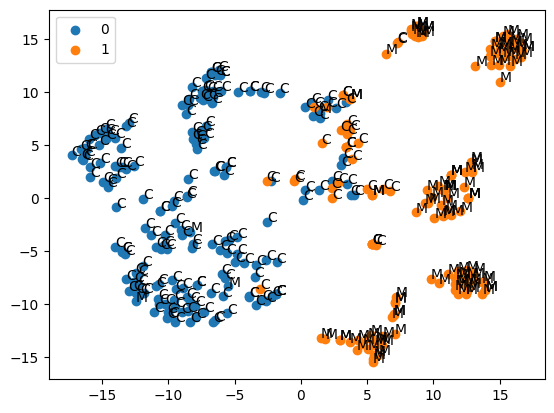

In [63]:
plot(matrix, R[1], R[0],19)